In [2]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense  
import pandas as pd

In [ ]:
# data = data.reshape((1, 10, 1))

# model = Sequential()
# model.add(LSTM(32, input_shape=(10, 1)))
# model.add(Dense(1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Number of samples = 4, sequence length = 3, features = 2

X = np.array( [ [ [0, 1], [1, 0,], [1, 1] ], 
                [ [1, 1], [1, 1,], [1, 0] ], 
                [ [0, 1], [1, 0,], [0, 0] ], 
                [ [1, 1], [1, 1,], [1, 1] ]  ] )

y = np.array([[1], [0], [1], [0]])
print(X)
print(X.shape)
print(y.shape)

model = Sequential()
model.add(LSTM(20, input_shape=(3, 2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X, y)

In [3]:
dataTrain=pd.read_csv("../data/newtrain.csv")
dataTest=pd.read_csv("../data/newtest.csv")
del dataTrain["Unnamed: 0"]
del dataTest["Unnamed: 0"]
del dataTrain["target_away"]
del dataTest["target_away"]

del dataTrain["gf_rolling"]
del dataTest["gf_rolling"]

del dataTrain["ga_rolling"]
del dataTest["ga_rolling"]

del dataTrain["sh_rolling"]
del dataTest["sh_rolling"]

del dataTrain["sot_rolling"]
del dataTest["sot_rolling"]

del dataTrain["dist_rolling"]
del dataTest["dist_rolling"]

del dataTrain["fk_rolling"]
del dataTest["fk_rolling"]

del dataTrain["pk_rolling"]
del dataTest["pk_rolling"]

del dataTrain["pkatt_rolling"]
del dataTest["pkatt_rolling"]

In [4]:
# Data Training
train_data = dataTrain.iloc[:, :-1]
train_labels = dataTrain.iloc[:, -1:]

# Data Testing
test_data = dataTest.iloc[:, :-1]
test_labels = dataTest.iloc[:, -1:]
train_data

,round,venue,gf,ga,xg,xga,poss,formation,sh,sot,dist,fk,pk,pkatt,venue_code,opp_code,hour,day_code,home_code
0,33,0,0.0,0.0,1.4,0.8,49.0,4,11.0,2.0,17.5,0.0,0.0,0.0,0,5,13,6,0
1,35,1,2.0,0.0,2.4,0.4,64.0,4,25.0,8.0,18.4,2.0,0.0,0.0,1,4,12,6,0
2,37,0,5.0,2.0,3.5,1.0,67.0,4,30.0,14.0,16.6,2.0,0.0,0.0,0,7,13,6,0
3,2,0,1.0,3.0,0.3,1.8,43.0,4,6.0,3.0,20.5,1.0,0.0,0.0,0,12,14,6,0
4,3,1,2.0,0.0,2.1,0.7,43.0,4,14.0,5.0,16.4,1.0,0.0,0.0,1,17,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,24,0,1.0,0.0,0.5,0.9,50.0,12,7.0,3.0,14.9,1.0,0.0,0.0,0,8,20,4,19
1802,28,1,2.0,1.0,1.1,0.3,61.0,12,16.0,6.0,20.5,1.0,0.0,0.0,1,4,12,6,19
1803,29,0,0.0,2.0,0.9,3.2,38.0,12,15.0,3.0,17.6,0.0,0.0,0.0,0,17,14,6,19
1804,30,0,0.0,1.0,0.3,0.7,59.0,3,9.0,3.0,21.5,0.0,0.0,0.0,0,7,18,2,19


In [5]:
train_data_reshape = train_data.values.reshape(-1, 1, 19)
train_data_reshape

array([[[33.,  0.,  0., ..., 13.,  6.,  0.]],

       [[35.,  1.,  2., ..., 12.,  6.,  0.]],

       [[37.,  0.,  5., ..., 13.,  6.,  0.]],

       ...,

       [[29.,  0.,  0., ..., 14.,  6., 19.]],

       [[30.,  0.,  0., ..., 18.,  2., 19.]],

       [[31.,  1.,  1., ..., 16.,  6., 19.]]])

In [6]:
train_data_reshape = np.reshape(train_data_reshape, (train_data_reshape.shape[0], -1, 1))
train_data_reshape

array([[[33.],
        [ 0.],
        [ 0.],
        ...,
        [13.],
        [ 6.],
        [ 0.]],

       [[35.],
        [ 1.],
        [ 2.],
        ...,
        [12.],
        [ 6.],
        [ 0.]],

       [[37.],
        [ 0.],
        [ 5.],
        ...,
        [13.],
        [ 6.],
        [ 0.]],

       ...,

       [[29.],
        [ 0.],
        [ 0.],
        ...,
        [14.],
        [ 6.],
        [19.]],

       [[30.],
        [ 0.],
        [ 0.],
        ...,
        [18.],
        [ 2.],
        [19.]],

       [[31.],
        [ 1.],
        [ 1.],
        ...,
        [16.],
        [ 6.],
        [19.]]])

In [10]:
train_labels_new = train_labels.values.reshape(-1, 1)
train_labels_new

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [14]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(19, 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(train_data_reshape, train_labels_new, epochs=10, batch_size=19)

Epoch 1/10
96/96 [==============================] - 10s 90ms/step - loss: 0.6694 - accuracy: 0.6085
Epoch 2/10
96/96 [==============================] - 8s 86ms/step - loss: 0.6636 - accuracy: 0.6113
Epoch 3/10
96/96 [==============================] - 8s 86ms/step - loss: 0.6417 - accuracy: 0.6323
Epoch 4/10
96/96 [==============================] - 9s 90ms/step - loss: 0.6108 - accuracy: 0.6733
Epoch 5/10
96/96 [==============================] - 9s 91ms/step - loss: 0.5918 - accuracy: 0.6833
Epoch 6/10
96/96 [==============================] - 9s 93ms/step - loss: 0.5893 - accuracy: 0.6822
Epoch 7/10
96/96 [==============================] - 8s 88ms/step - loss: 0.5724 - accuracy: 0.6977
Epoch 8/10
96/96 [==============================] - 9s 90ms/step - loss: 0.5639 - accuracy: 0.7132
Epoch 9/10
96/96 [==============================] - 9s 90ms/step - loss: 0.5247 - accuracy: 0.7431
Epoch 10/10
96/96 [==============================] - 9s 94ms/step - loss: 0.4441 - accuracy: 0.7913


In [17]:
test_data_reshape = test_data.values.reshape(-1, 1, 19)
test_data_reshape = np.reshape(test_data_reshape, (test_data_reshape.shape[0], -1, 1))
test_data_reshape

array([[[ 0.],
        [ 0.],
        [ 2.],
        ...,
        [20.],
        [ 4.],
        [ 0.]],

       [[11.],
        [ 1.],
        [ 4.],
        ...,
        [15.],
        [ 5.],
        [ 0.]],

       [[22.],
        [ 0.],
        [ 3.],
        ...,
        [17.],
        [ 5.],
        [ 0.]],

       ...,

       [[21.],
        [ 0.],
        [ 1.],
        ...,
        [15.],
        [ 5.],
        [19.]],

       [[23.],
        [ 1.],
        [ 1.],
        ...,
        [15.],
        [ 5.],
        [19.]],

       [[24.],
        [ 1.],
        [ 2.],
        ...,
        [15.],
        [ 5.],
        [19.]]])

In [18]:
test_labels_new = test_labels.values.reshape(-1, 1)
test_labels_new

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [19]:
loss, accuracy = model.evaluate(test_data_reshape, test_labels_new)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

20/20 [==============================] - 1s 45ms/step - loss: 0.3968 - accuracy: 0.8128
Loss: 0.3968
Accuracy: 0.8128


Epoch 1/10
96/96 [==============================] - 10s 100ms/step - loss: 0.3502 - accuracy: 0.8411 - val_loss: 0.4778 - val_accuracy: 0.7718
Epoch 2/10
96/96 [==============================] - 10s 105ms/step - loss: 0.1907 - accuracy: 0.9219 - val_loss: 0.1234 - val_accuracy: 0.9573
Epoch 3/10
96/96 [==============================] - 10s 107ms/step - loss: 0.1635 - accuracy: 0.9352 - val_loss: 0.1031 - val_accuracy: 0.9672
Epoch 4/10
96/96 [==============================] - 11s 114ms/step - loss: 0.0876 - accuracy: 0.9701 - val_loss: 0.0590 - val_accuracy: 0.9852
Epoch 5/10
96/96 [==============================] - 10s 109ms/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 6/10
96/96 [==============================] - 11s 113ms/step - loss: 0.0244 - accuracy: 0.9906 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.0318 - val_accuracy: 0.9901

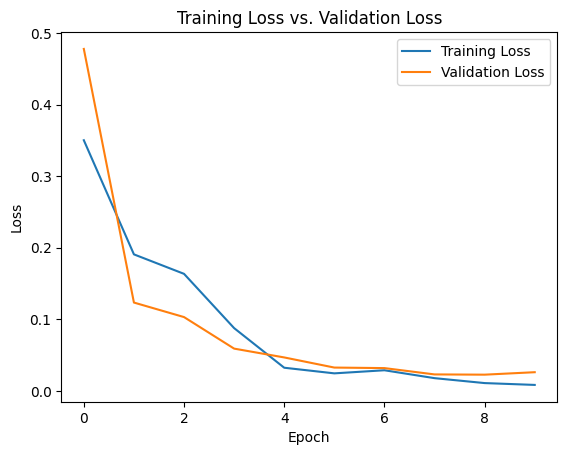

In [20]:
import matplotlib.pyplot as plt

# Melatih model
history = model.fit(train_data_reshape, train_labels_new, epochs=10, batch_size=19, validation_data=(test_data_reshape, test_labels_new))

# Mendapatkan training loss dan validation loss dari history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Menampilkan grafik training loss dan validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.show()

20/20 [==============================] - 1s 40ms/step


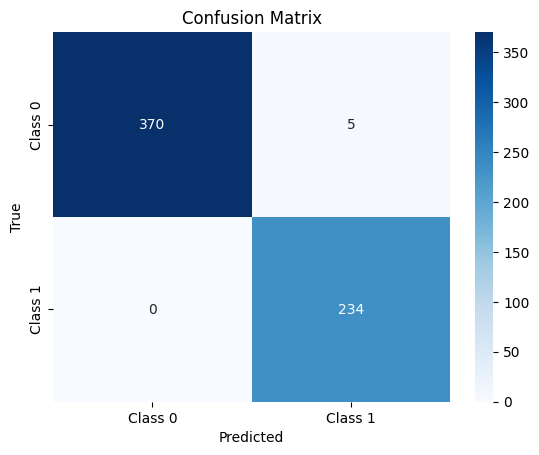

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Melakukan prediksi pada data testing
predictions = model.predict(test_data_reshape)
predictions = (predictions > 0.5).astype(int)  # Mengubah prediksi menjadi nilai biner (0 atau 1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels_new, predictions)

# Membuat visualisasi confusion matrix
labels = ['Class 0', 'Class 1']  # Label untuk matriks
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Menambahkan label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('True')

# Menampilkan judul
plt.title('Confusion Matrix')

# Menampilkan plot
plt.show()